In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [20]:
df1 = pd.read_csv("processed_part1.csv")
df2 = pd.read_csv("processed_part2.csv")
df3 = pd.read_csv("processed_part3.csv")

In [25]:
df = pd.concat([df1, df2, df3], axis = 0)

In [27]:
df

,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Severity,Secondary_Accident,severity_ave
0,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,3,0,NaN
1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,3,1,2.0
2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,2,0,NaN
3,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,2,0,NaN
4,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,2,0,NaN
...,...,...,...,...,...,...,...,...
1171200,2020-06-30 22:51:25,2020-06-30 23:20:50,41.813580,-71.404823,0.000,3,0,NaN
1171201,2020-06-30 22:52:02,2020-06-30 23:17:54,32.837406,-96.814911,0.000,2,0,NaN
1171202,2020-06-30 22:52:37,2020-06-30 23:22:24,36.096111,-86.737648,0.000,2,0,NaN
1171203,2020-06-30 22:56:52,2020-06-30 23:26:26,32.767036,-96.859627,0.000,3,0,NaN


In [29]:
df["Secondary_Accident"].value_counts()

0      3348392
1       143247
2        16022
3         3207
4         1289
5          475
6          280
8          175
7          162
9           52
10          51
11          36
12          33
13          28
14          17
15          14
16          12
20          12
17          10
18           8
33           8
31           8
28           7
26           7
22           6
19           5
38           5
21           5
96           4
32           4
29           4
23           3
24           3
27           3
25           2
77           2
30           2
106          1
115          1
99           1
98           1
97           1
92           1
84           1
46           1
75           1
65           1
62           1
59           1
41           1
40           1
37           1
124          1
126          1
Name: Secondary_Accident, dtype: int64

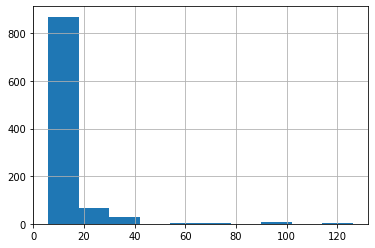

In [37]:
df["Secondary_Accident"].loc[df["Secondary_Accident"]>5].hist()

색상: 심각도

크기: 2차사고 빈도 수

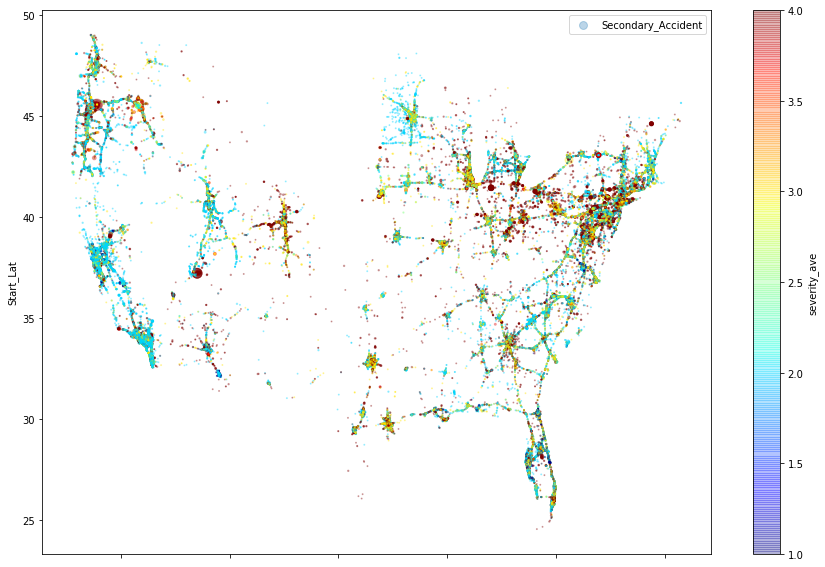

In [47]:
df.plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (df["Secondary_Accident"]), c = "severity_ave", cmap =  plt.get_cmap("jet"), label = "Secondary_Accident", figsize = (15, 10))

In [65]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df["Secondary_Accident_Scale"] = std_scaler.fit_transform(df[["Secondary_Accident"]])

사고수 Scale해서 같은 Plot

/Users/HongSukhyun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


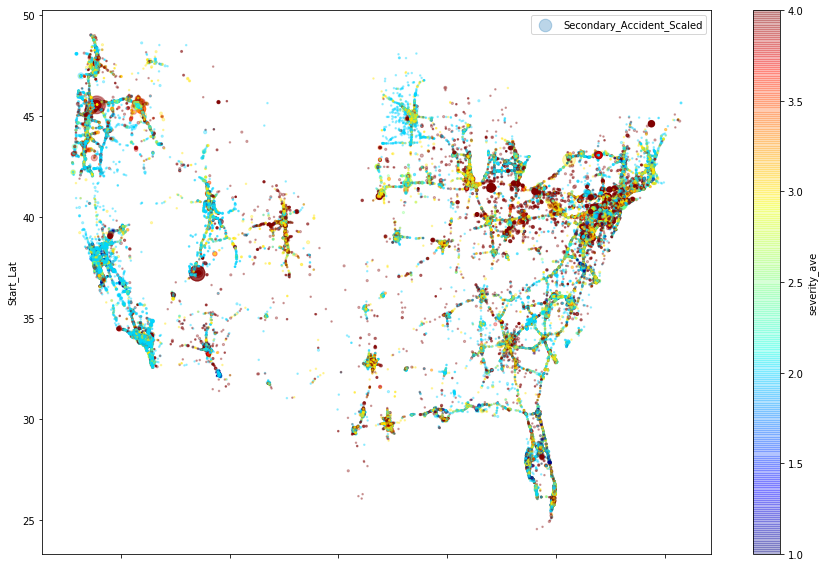

In [66]:
df.plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (df["Secondary_Accident_Scale"]), c = "severity_ave", cmap =  plt.get_cmap("jet"), label = "Secondary_Accident_Scaled", figsize = (15, 10))

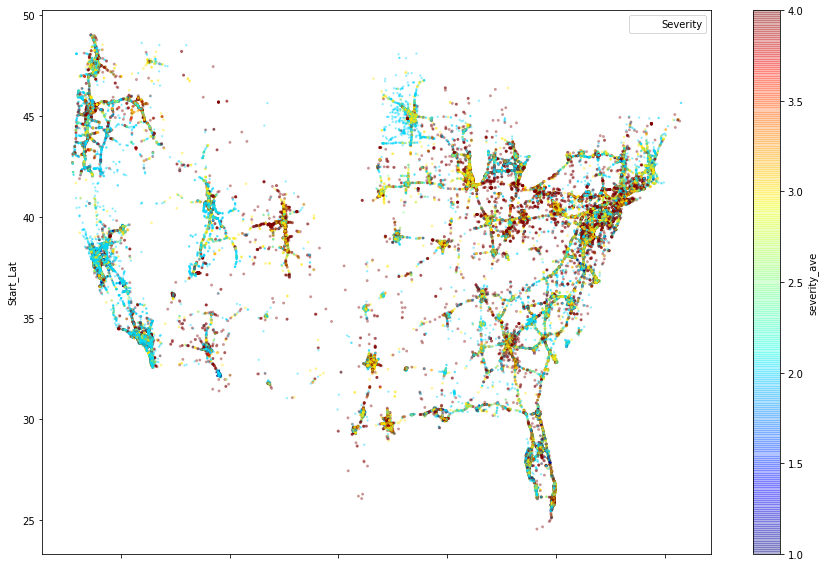

In [49]:
df.plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (df["severity_ave"]), c = "severity_ave", cmap =  plt.get_cmap("jet"), label = "Severity", figsize = (15, 10))